<a href="https://colab.research.google.com/github/AbhishekRP2002/AbhisX12/blob/main/Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

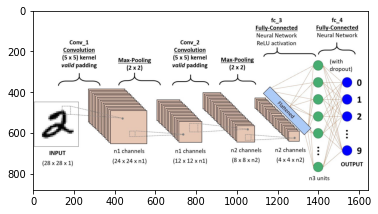

In [2]:
url = ('/content/cnn.jpeg')
img = cv2.imread(url)
plt.imshow(img)

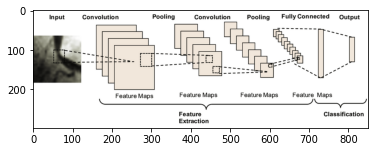

In [4]:
url = ('/content/The-architecture-of-a-typical-Convolutional-Neural-Network-CNN.png')

img = cv2.imread(url)
plt.imshow(img)